In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import re
import spacy
import nltk
%matplotlib inline

/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Import TextEdit Documents 
# Put Text Edit Documents into A Dataframe
# Inside Data Frame, the columns should include; Source, Document

# path to folders /Users/ayankarim/documents/thinkful/bootcamp/Unit 6 Advanced NLP/20news-bydate/20news-bydate-train

train_directory = '/Users/ayankarim/documents/thinkful/bootcamp/Unit 6 Advanced NLP/20news-bydate/20news-bydate-train'


# def scan_folder(parent):
#     # iterate over all the files in directory 'parent'
#     for file_name in os.listdir(train_directory):
        
#         if file_name.endswith(".txt"):
#             # if it's a txt file, print its name (or do whatever you want)
#             print(file_name)
#         else:
#             current_path = "".join((parent, "/", file_name))
#             if os.path.isdir(current_path):
#                 # if we're checking a sub-directory, recall this method
#                 scan_folder(current_path)



In [3]:
folders = []
for folder in os.listdir(train_directory):
    folders.append(folder)
    
folders.remove('.DS_Store')

print(folders)

['talk.politics.mideast', 'rec.autos', 'comp.sys.mac.hardware', 'alt.atheism', 'rec.sport.baseball', 'comp.os.ms-windows.misc', 'rec.sport.hockey', 'sci.crypt', 'sci.med', 'talk.politics.misc', 'rec.motorcycles', 'comp.windows.x', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.electronics', 'talk.politics.guns', 'sci.space', 'soc.religion.christian', 'misc.forsale', 'talk.religion.misc']


In [4]:
len(folders)

20

In [5]:
# Define path to text files that contain the novels

topics = []
articles = []
texts = []

for name in folders:
    path = '/Users/ayankarim/documents/thinkful/bootcamp/Unit 6 Advanced NLP/20news-bydate/20news-bydate-train/' + str(name) + '/*'
    files = glob.glob(path)
    # Create empty lists to store information on author, title, and content of the text
    # assign author, title and content of texts to lists
    for filename in files:
        try:
            with open(filename, 'rb') as f:
                topics.append(name)
                articles.append(filename.split('n/')[1])
                texts.append(f.read())
        except IOError as exc:
            if exc.errno != errno.EISDIR:
                raise

# Convert type object type from bytes to strings         
texts = [text.decode('ISO-8859-1') for text in texts]

In [6]:
# go to first folder, save title of folder as the topic
# import all data to text list and save title to title list


In [7]:
# # Utility function for standard text cleaning.
# def text_cleaner(text):
#     # Visual inspection identifies a form of punctuation spaCy does not
#     # recognize: the double dash '--'.  Better get rid of it now!
#     text = re.sub(r'--',' ',text)
#     text = re.sub("[\[].*?[\]]", "", text)
#     #text = re.sub("\n", " ", text)
#     text = re.sub("\'", "", text)
#     text = re.sub(r'Chapter \d+','', text)
#     text = re.sub(r'CHAPTER \d+','', text)
#     text = re.sub(r'chapter \d+','', text)
#     text = ' '.join(text.split())
#     return text

In [8]:
print(len(topics))
print(len(articles))
print(len(texts))

11314
11314
11314


In [9]:
# Sparse the text
nlp = spacy.load('en')
texts = [nlp(text) for text in texts]

In [10]:
# Create dictionary containing information on data set for title, author and text
text_dict = {}
text_dict['topics'] = topics
text_dict['articles'] = articles
text_dict['texts'] = texts
text_dict.keys()

dict_keys(['topics', 'articles', 'texts'])

In [11]:
# Create a data frame from dictionary containing the data set
df = pd.DataFrame({'topics':text_dict['topics'], 'articles':text_dict['articles'], 'texts':text_dict['texts']})

In [12]:
# Convert tuples to string
df['texts'] = df['texts'].astype(str)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 3 columns):
topics      11314 non-null object
articles    11314 non-null object
texts       11314 non-null object
dtypes: object(3)
memory usage: 265.2+ KB


In [14]:
# Tokenize sentences
df['texts'] = df.apply(lambda row: nltk.word_tokenize(row['texts']), axis=1)

In [15]:
from nltk.corpus import stopwords

# Remove all stop words
stop = stopwords.words('english')
df['texts'] = df['texts'].apply(lambda x: [item for item in x if item not in stop])

In [16]:
# Lower Case everything
df['texts'] = df['texts'].astype(str)
df['texts'] = df['texts'].apply(lambda x: x.lower())

In [17]:
from string import punctuation

# remove all punctuations
df['texts'] = df['texts'].apply(lambda x: ''.join(c for c in x if c not in punctuation))

In [18]:
df.head()

,topics,articles,texts
0,talk.politics.mideast,talk.politics.mideast/75895,from hm csbrownedu harry mamaysky subject ...
1,talk.politics.mideast,talk.politics.mideast/76248,from waldo cybernetcsefauedu todd j dicker ...
2,talk.politics.mideast,talk.politics.mideast/76277,from clgannon newcastleacuk space cadet su...
3,talk.politics.mideast,talk.politics.mideast/76045,from shaig thinkcom shai guday subject ba...
4,talk.politics.mideast,talk.politics.mideast/76283,from koc rizeeceorstedu cetin kaya koc sub...


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# Creat TF-IDF Matrix

# Creating the tf-idf matrix.
vectorizer = TfidfVectorizer(stop_words='english')
train_tfidf=vectorizer.fit_transform(df['texts'])

In [20]:
# Getting the word list.
terms = vectorizer.get_feature_names()

# Number of topics.
ntopics=20

In [21]:
# Linking words to topics
def word_topic(tfidf, solution, wordlist):
    
    # Loading scores for each word on each topic/component.
    words_by_topic=tfidf.T * solution

    # Linking the loadings to the words in an easy-to-read way.
    components=pd.DataFrame(words_by_topic,index=wordlist)
    
    return components

# Extracts the top N words and their loadings for each topic.
def top_words(components, n_top_words):
    n_topics = range(components.shape[1])
    index= np.repeat(n_topics, n_top_words, axis=0)
    topwords=pd.Series(index=index)
    for column in range(components.shape[1]):
        # Sort the column so that highest loadings are at the top.
        sortedwords=components.iloc[:,column].sort_values(ascending=False)
        # Choose the N highest loadings.
        chosen=sortedwords[:n_top_words]
        # Combine loading and index into a string.
        chosenlist=chosen.index +" "+round(chosen,2).map(str) 
        topwords.loc[column]=chosenlist
    return(topwords)

# Number of words to look at for each topic.
n_top_words = 10

In [22]:
# LSA

from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

svd= TruncatedSVD(ntopics)
lsa = make_pipeline(svd, Normalizer(copy=False))
train_lsa = lsa.fit_transform(train_tfidf)

components_lsa = word_topic(train_tfidf, train_lsa, terms)

topwords=pd.DataFrame()
topwords['LSA']=top_words(components_lsa, n_top_words)                


In [23]:
# LDA
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_topics=ntopics, 
          doc_topic_prior=None, # Prior = 1/n_documents
          topic_word_prior=1/ntopics,
          learning_decay=0.7, # Convergence rate.
          learning_offset=10.0, # Causes earlier iterations to have less influence on the learning
          max_iter=10, # when to stop even if the model is not converging (to prevent running forever)
          evaluate_every=-1, # Do not evaluate perplexity, as it slows training time.
          mean_change_tol=0.001, # Stop updating the document topic distribution in the E-step when mean change is < tol
          max_doc_update_iter=100, # When to stop updating the document topic distribution in the E-step even if tol is not reached
          n_jobs=-1, # Use all available CPUs to speed up processing time.
          verbose=0, # amount of output to give while iterating
          random_state=0
         )

train_lda = lda.fit_transform(train_tfidf) 

components_lda = word_topic(train_tfidf, train_lda, terms)

topwords['LDA']=top_words(components_lda, n_top_words)


/usr/local/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [24]:
# NNMF

from sklearn.decomposition import NMF

nmf = NMF(alpha=0.0, 
          init='nndsvdar', # how starting value are calculated
          l1_ratio=0.0, # Sets whether regularization is L2 (0), L1 (1), or a combination (values between 0 and 1)
          max_iter=200, # when to stop even if the model is not converging (to prevent running forever)
          n_components=ntopics, 
          random_state=0, 
          solver='cd', # Use Coordinate Descent to solve
          tol=0.0001, # model will stop if tfidf-WH <= tol
          verbose=0 # amount of output to give while iterating
         )
train_nmf = nmf.fit_transform(train_tfidf) 

components_nmf = word_topic(train_tfidf, train_nmf, terms)

topwords['NNMF']=top_words(components_nmf, n_top_words)

In [25]:
for topic in range(ntopics):
    print('Topic {}:'.format(topic))
    print(topwords.loc[topic])

Topic 0:
                  LSA                    LDA               NNMF
0            nt 158.0              nt 108.12            car 2.8
0      subject 101.99          subject 75.78          bike 1.43
0        lines 101.04            lines 75.67            nt 1.31
0  organization 99.85     organization 74.51        writes 1.04
0        writes 99.04           writes 66.67       article 1.03
0        article 90.5       university 66.13          cars 0.97
0    university 88.58          article 60.52          like 0.83
0           like 83.1  nntppostinghost 60.49       subject 0.79
0        people 80.29             like 59.11  organization 0.79
0          know 78.18             know 56.14         lines 0.78
Topic 1:
               LSA                   LDA             NNMF
1         god 47.7               nt 4.46        god 10.18
1      jesus 22.53          subject 3.19        jesus 4.3
1     people 21.54            lines 3.18       bible 2.75
1      bible 14.79     organization 3.16      

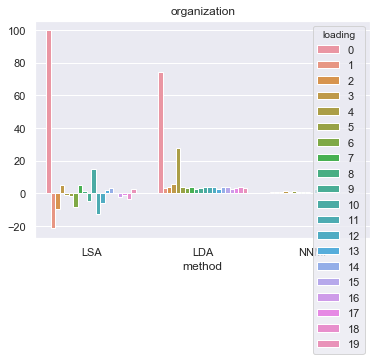

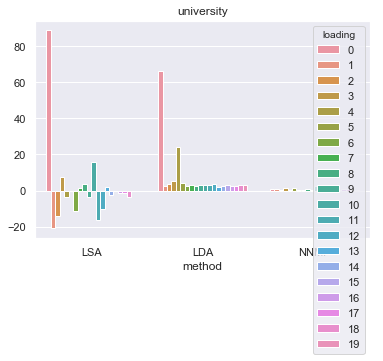

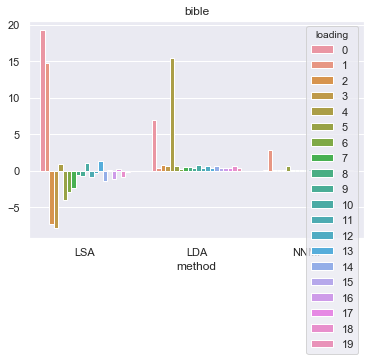

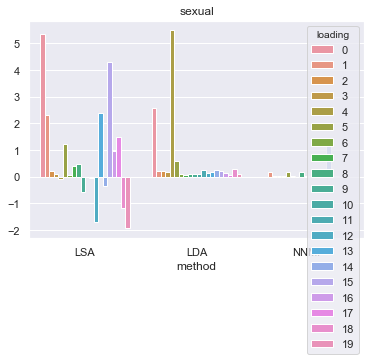

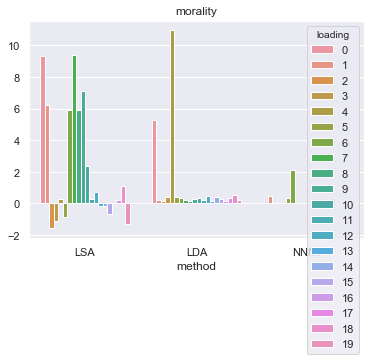

In [28]:
# organization, university, bible, sexual, morality

# The words to look at.
targetwords=['organization','university','bible','sexual', 'morality']

# Storing the loadings.
wordloadings=pd.DataFrame(columns=targetwords)

# For each word, extracting and string the loadings for each method.
for word in targetwords:
    loadings=components_lsa.loc[word].append(
        components_lda.loc[word]).append(
            components_nmf.loc[word])
    wordloadings[word]=loadings

# Labeling the data by method and providing an ordering variable for graphing purposes. 
wordloadings['method']=np.repeat(['LSA','LDA','NNMF'], 20, axis=0)
wordloadings['loading']=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]*3

sns.set(style="darkgrid")

for word in targetwords:
    sns.barplot(x="method", y=word, hue="loading", data=wordloadings)
    plt.title(word)
    plt.ylabel("")
    plt.show()


# Conclusion

From the algorithms run above, I believe that Non-Negative Matrix Factorization may be the most useful algorithm for topic modelling this corpus of text. According to our visualizations of sparsity, NNMF is is easily the most sparse as there isn't much positive loading for these words in each of the topics. This is important for our corpus because we have many topics (20). Since we have that many topics, we want strong separability when assignin topics to text and words to topics. This model can therefore distinguish between the topics easier. Given that there are many topics, words and phrases can overlap between them, so better sparsity is good.